### Import Libraries

In [56]:
 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Customize

In [57]:
# Load Data 
data = pd.read_csv('0604 Sales_data.csv')
my_detailed_report='0604_ABC_Details.csv'
my_summary_report='0604_ABC_Summary.csv'
my_cum_cost_plot='0604_ABC_Cumulative_Cost.png'
my_abc_per_sku='0604_ABC_Cost_per_SKU.png'
my_abc_class='0604_ABC_Class_Distribution.png'

# Cost Alert System 
ALERT_THRESHOLD = 100000  # Adjust this value as needed

my_a_thresh=0.6
my_b_thresh=0.85

#Specify columns that will be used for ABC analysis 
my_columns= ['SKU_number', 'PriceReg', 'ItemCount']

C:\Users\ahmed\AppData\Local\Temp\ipykernel_5384\1579117401.py:2: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('0604 Sales_data.csv')


### Preprocessing and classification

In [58]:
# Preprocessing 
data_sub = data.loc[data['File_Type'] == 'Historical', my_columns].copy()
data_sub['TotalCost'] = data_sub['PriceReg'] * data_sub['ItemCount']
data_sub = data_sub.sort_values(by='TotalCost', ascending=False).reset_index(drop=True)

# ABC Segmentation Function with Thresholds 
def abc_segment(perc, a_thresh=my_a_thresh, b_thresh=my_b_thresh):
    if perc < a_thresh:
        return 'A'
    elif perc < b_thresh:
        return 'B'
    else:
        return 'C'

# Cumulative Cost and Classification 
data_sub['RunCumCost'] = data_sub['TotalCost'].cumsum()
total_cost = data_sub['TotalCost'].sum()
data_sub['RunPerc'] = data_sub['RunCumCost'] / total_cost
data_sub['Class'] = data_sub['RunPerc'].apply(lambda x: abc_segment(x, 0.6, 0.85))

# Summary Table 
summary = data_sub.groupby('Class').agg(
    Total_SKUs=('SKU_number', 'count'),
    Total_Cost=('TotalCost', 'sum')
)
summary['% Cost'] = 100 * summary['Total_Cost'] / summary['Total_Cost'].sum()

### Data Output

In [59]:
# Output Summary 
print("\n ABC Class Summary:")
print(summary)

# Cost Totals by Class
for cls in ['A', 'B', 'C']:
    cost = data_sub[data_sub['Class'] == cls]['TotalCost'].sum()
    percent = cost / total_cost * 100
    print(f"\nClass {cls} → Cost: {cost:,.2f} ({percent:.2f}%)")


 ABC Class Summary:
       Total_SKUs        Total_Cost     % Cost
Class                                         
A           16681  212125200.709999  59.999814
B           22508       88384263.38  24.999573
C           36807       53033630.92  15.000613

Class A → Cost: 212,125,200.71 (60.00%)

Class B → Cost: 88,384,263.38 (25.00%)

Class C → Cost: 53,033,630.92 (15.00%)


### Generating Alerts

In [60]:
data_sub['Alert'] = np.where((data_sub['Class'] == 'A') & (data_sub['TotalCost'] > ALERT_THRESHOLD), ' High Cost', '')


# Print cost Alerts
alerts = data_sub[data_sub['Alert'] != '']
if not alerts.empty:
    print("\n Cost Alerts for High-Cost Class A SKUs:")
    print(alerts[['SKU_number', 'TotalCost', 'ItemCount','Alert']])
else:
    print("\n No high-cost Class A SKUs triggered an alert.")



 Cost Alerts for High-Cost Class A SKUs:
   SKU_number  TotalCost ItemCount       Alert
0      145890   209251.2       852   High Cost
1      435035   174487.6       617   High Cost
2      538480   132315.0        50   High Cost
3      212634   123505.2       522   High Cost
4      212481   121684.0       580   High Cost
5      146454   105000.0       375   High Cost
6       53668   104715.0       537   High Cost
7      146386   103880.0       371   High Cost
8      110449   103512.5       245   High Cost
9      416610  103133.25       297   High Cost
10     111900   101146.5       273   High Cost


### Visualisation and plot output

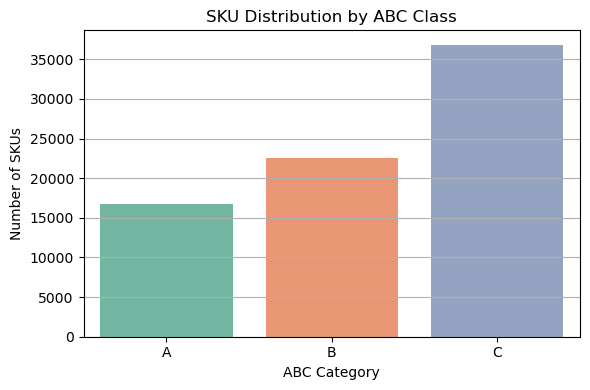

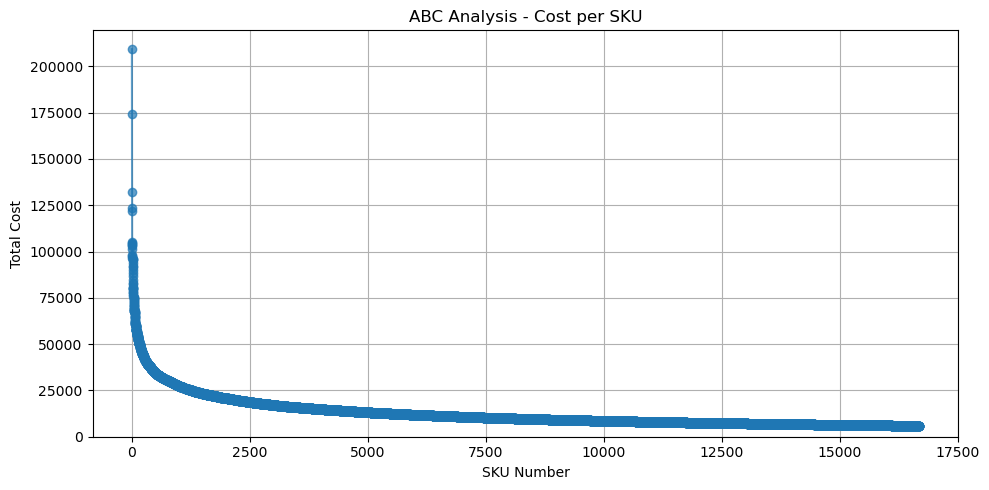

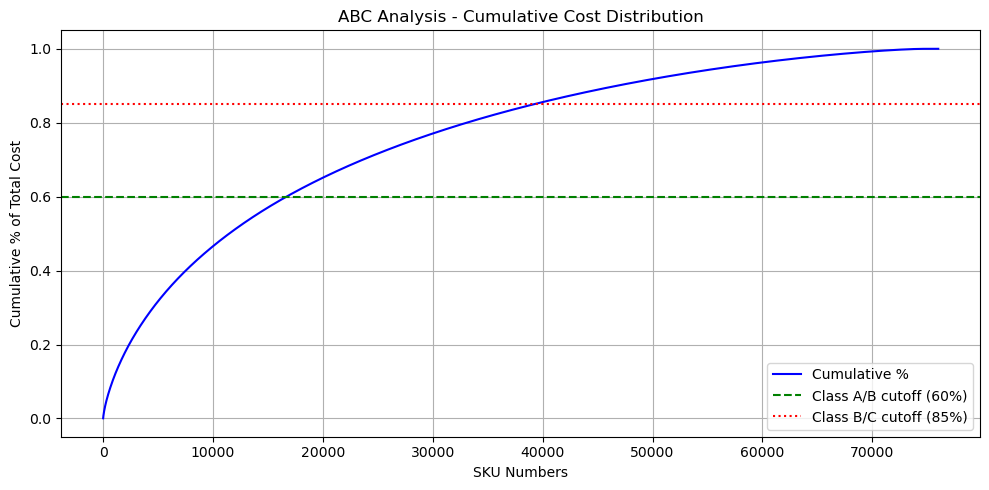

In [64]:
# Bar Chart: Count of Items by Class 
plt.figure(figsize=(6, 4))
sns.countplot(data=data_sub, x='Class', hue='Class', order=['A', 'B', 'C'], palette='Set2')
plt.title('SKU Distribution by ABC Class')
plt.xlabel('ABC Category')
plt.ylabel('Number of SKUs')
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig(my_abc_class, dpi=300)
plt.show()

# Line Chart: TotalCost per SKU 

plt.figure(figsize=(10, 5))
plt.plot(data_sub['TotalCost'].values, marker='o', linestyle='-', alpha=0.7)
plt.title('ABC Analysis - Cost per SKU')
plt.xlabel('SKU Number')
plt.ylabel('Total Cost')
plt.grid(True)
plt.ylim(bottom=0)
plt.tight_layout()
plt.savefig(my_abc_per_sku, dpi=300)
plt.show()

# Cumulative Cost Plot with Cutoffs 
plt.figure(figsize=(10, 5))
plt.plot(data_sub['RunPerc'].values, label='Cumulative %', color='blue')
plt.axhline(0.6, color='green', linestyle='--', label='Class A/B cutoff (60%)')
plt.axhline(0.85, color='red', linestyle=':', label='Class B/C cutoff (85%)')
plt.title('ABC Analysis - Cumulative Cost Distribution')
plt.xlabel('SKU Numbers')
plt.ylabel('Cumulative % of Total Cost')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(my_cum_cost_plot, dpi=300)
plt.show()



## Output data to CSV file

In [62]:
# Export to CSV files 
data_sub.to_csv(my_detailed_report, index=False, encoding='utf-8')
summary.to_csv(my_summary_report, index=True, encoding='utf-8')
print(f"\n Exported results to {my_detailed_report}  and {my_summary_report}")



 Exported results to 0604_ABC_Details.csv  and 0604_ABC_Summary.csv


In [63]:
filtered_data

,SKU_number,PriceReg,ItemCount,TotalCost,RunCumCost,RunPerc,Class,Alert
0,145890,245.6,852,209251.2,209251.2,0.000592,A,High Cost
1,435035,282.8,617,174487.6,383738.8,0.001085,A,High Cost
2,538480,2646.3,50,132315.0,516053.8,0.00146,A,High Cost
3,212634,236.6,522,123505.2,639559.0,0.001809,A,High Cost
4,212481,209.8,580,121684.0,761243.0,0.002153,A,High Cost
...,...,...,...,...,...,...,...,...
16676,594653,189.95,31,5888.45,212101648.609999,0.599932,A,
16677,178923,154.95,38,5888.1,212107536.709999,0.599948,A,
16678,620247,128.0,46,5888.0,212113424.709999,0.599965,A,
16679,620829,73.6,80,5888.0,212119312.709999,0.599981,A,
